In [1]:
from hearing_assistive import *
import collections
import numpy as np

%matplotlib inline

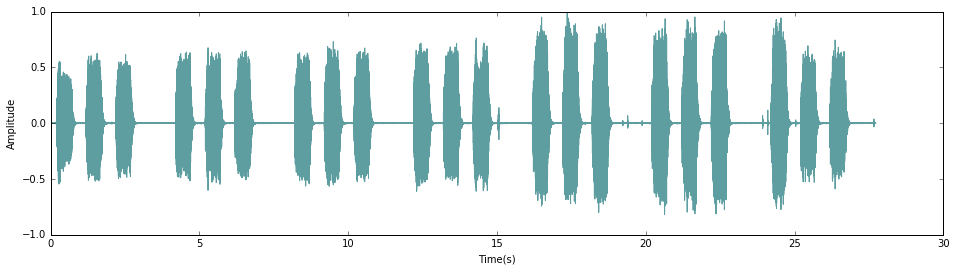

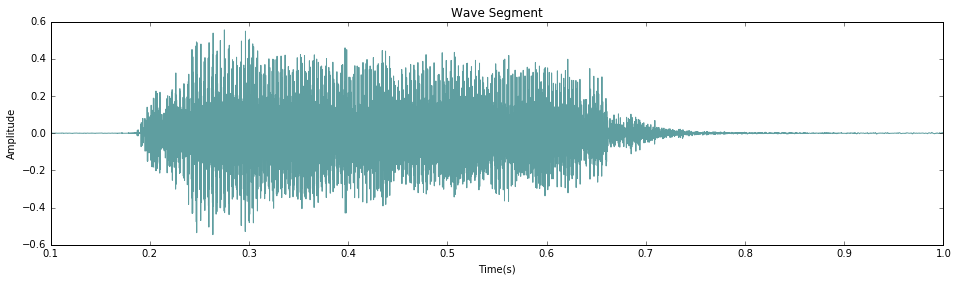

In [2]:
wave = read_wave('Sounds/school_fire_alarm.wav')
wave.normalize()
wave.plot()
segment = wave.segment(0.1, 1.0)
segment.plot('Wave Segment')
segment.make_audio()

In [3]:
spectrogram = wave.make_spectrogram(512)

freq_vector = {}
for t, spect in spectrogram.spec_map.iteritems():
    amps = np.abs(spect.hs)
    max_amp = max(amps)
    
    freq = 0
    for i in range(len(amps)):
        if amps[i] == max_amp:
            freq = i
            freq_vector[t] = spect.fs[freq]

od = collections.OrderedDict(sorted(freq_vector.items()))

print len(od)
for i in range(5):
    print od.keys()[i+40], ',', od.values()[i+40]

4775
0.237993197279 , 1981.0546875
0.243798185941 , 1981.0546875
0.249603174603 , 1981.0546875
0.255408163265 , 1981.0546875
0.261213151927 , 2239.453125


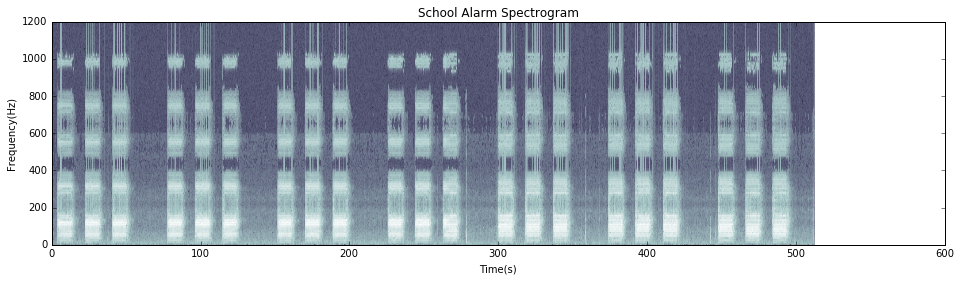

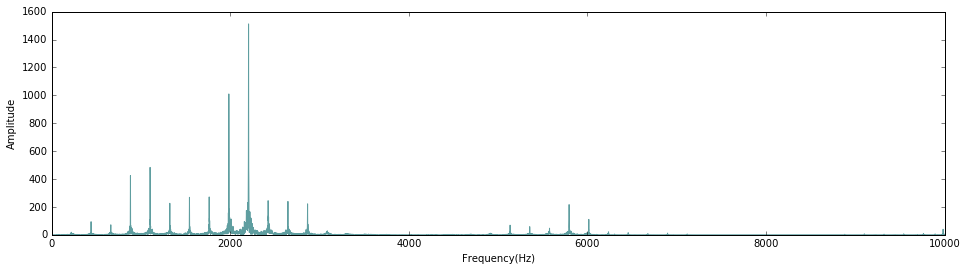

In [4]:
spectrogram.plot('School Alarm Spectrogram')

spectrum = segment.make_spectrum()
spectrum.low_pass(10000)
spectrum.plot(high=10000)

wave.make_audio()

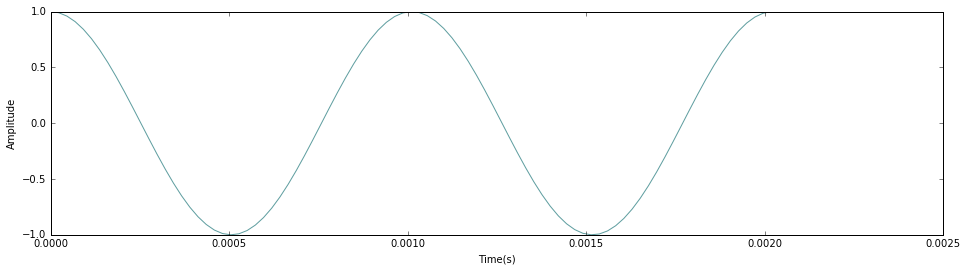

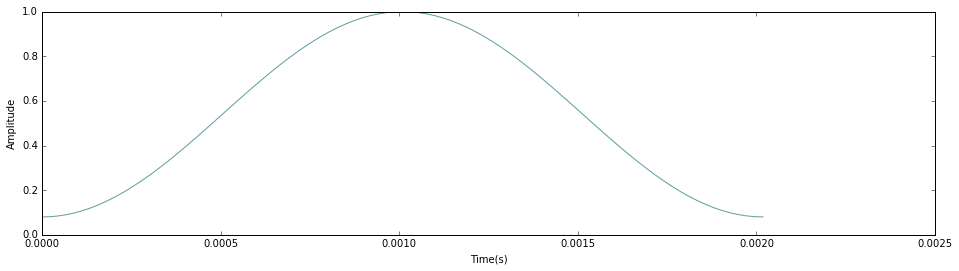

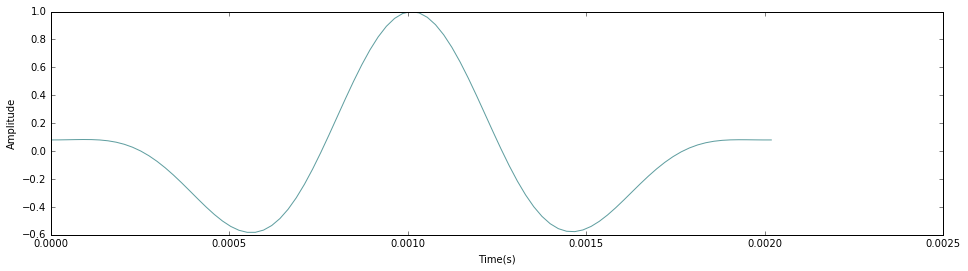

In [8]:
# The following cells shows why we need to apply a window function to each spectrum
fs = 44100                                 # sampling rate
t = np.arange(0.0,0.002,1.0/fs)            # all points between -0.002 and 0.002 by step 1/fs
f0 = 1000                                  # frequency
phi = np.pi/2                              # phase
A = 1.0                                    # amplitude
signal = A*np.sin(2*np.pi*f0*t+phi)

# this is a standard sine wave
sinwave = Wave(signal, t, fs)
sinwave.plot()

# this is a hamming window function
window = np.hamming(len(sinwave.ys))
win_wave = Wave(window, t, fs)
win_wave.plot()

# after we apply a window function, the start and end values become zero.
# we want this because DFTs treat signal waves as continuous.
sinwave.ys *= window
sinwave.plot()

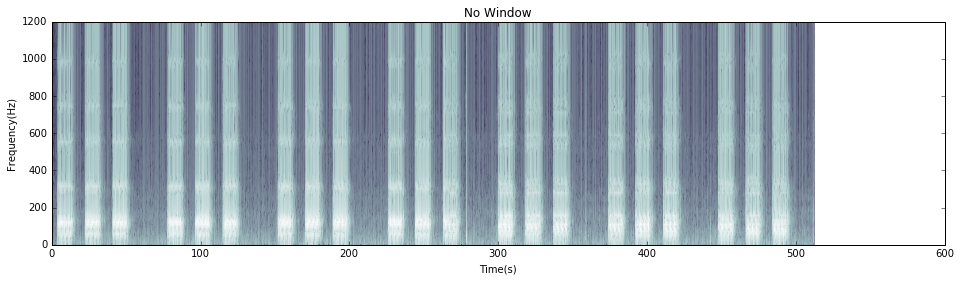

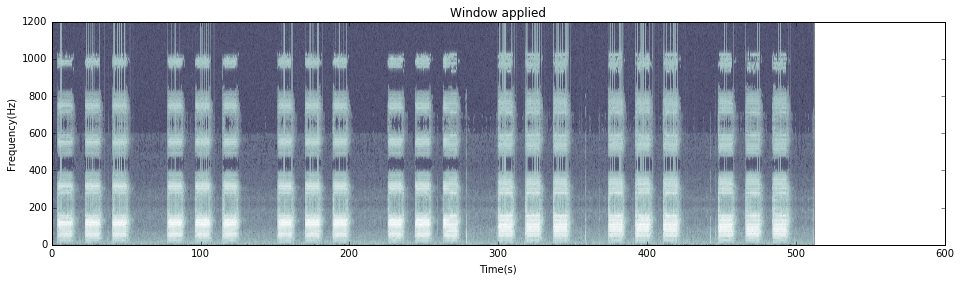

In [6]:
specgram = wave.make_spectrogram(512, win_flag=False)
specgram2 = wave.make_spectrogram(512, win_flag=True)

specgram.plot('No Window')
specgram2.plot('Window applied')